In [288]:
install.packages("readr")
install.packages("rpart")
install.packages("caret")
install.packages("ranger")
install.packages("tidymodels")
install.packages("kernlab")

Warning message:
"package 'readr' is in use and will not be installed"
Warning message:
"package 'rpart' is in use and will not be installed"
Warning message:
"package 'caret' is in use and will not be installed"
Warning message:
"package 'ranger' is in use and will not be installed"
Warning message:
"package 'tidymodels' is in use and will not be installed"
Installing package into 'C:/Users/isacs/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\isacs\AppData\Local\Temp\RtmpewqnOV\downloaded_packages


In [289]:
library(tidyverse)
library(lubridate)
library(hms)
library(readr)
library(tidyr)
library(dplyr)
library(caret)
library(rpart)
library(ranger)
library(tidymodels)
library(modelr)
library(kernlab)


Attaching package: 'kernlab'


The following object is masked from 'package:scales':

    alpha


The following object is masked from 'package:purrr':

    cross


The following object is masked from 'package:ggplot2':

    alpha




## TASK 8

### Political Seats

Read the political seats dataset

In [166]:
political_seats <- read_delim("../datasets/political_seats.csv", delim = ",", locale = locale(encoding = "ISO-8859-1"), skip = 2)
head(political_seats)

Rows: 2619 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): region, party, 1973, 1976, 1979, 1982, 1985, 1988, 1991, 1994, 199...
dbl  (2): 2018, 2022

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


region,party,1973,1976,1979,1982,1985,1988,1991,1994,1998,2002,2006,2010,2014,2018,2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0114 Upplands Väsby,The Moderate Party,6,7,10,13,13,12,15,14,16,11,17,17,13,12,11
0114 Upplands Väsby,The Centre Party,9,7,6,4,2,2,2,2,2,2,2,2,2,2,2
0114 Upplands Väsby,The Liberal Party,4,5,5,3,6,7,6,4,4,8,6,6,4,3,2
0114 Upplands Väsby,The Christian Democratic Party,0,0,0,1,0,0,2,1,3,3,3,2,2,3,2
0114 Upplands Väsby,The Green Party,..,..,..,1,2,4,2,3,2,2,3,5,5,2,2
0114 Upplands Väsby,The Social Democratic Party,19,19,23,24,23,23,18,24,18,20,16,15,16,13,14


Replace the null values ("..") with zeroes instead

In [167]:
print(colSums(political_seats == ".."))

political_seats[political_seats==".."] <- "0"

print(colSums(political_seats == ".."))
head(political_seats)

region  party   1973   1976   1979   1982   1985   1988   1991   1994   1998 
     0      0    673    680    666    347    347     63     45     27     18 
  2002   2006   2010   2014   2018   2022 
     9      9      9      9      0      0 
region  party   1973   1976   1979   1982   1985   1988   1991   1994   1998 
     0      0      0      0      0      0      0      0      0      0      0 
  2002   2006   2010   2014   2018   2022 
     0      0      0      0      0      0 


region,party,1973,1976,1979,1982,1985,1988,1991,1994,1998,2002,2006,2010,2014,2018,2022
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
0114 Upplands Väsby,The Moderate Party,6,7,10,13,13,12,15,14,16,11,17,17,13,12,11
0114 Upplands Väsby,The Centre Party,9,7,6,4,2,2,2,2,2,2,2,2,2,2,2
0114 Upplands Väsby,The Liberal Party,4,5,5,3,6,7,6,4,4,8,6,6,4,3,2
0114 Upplands Väsby,The Christian Democratic Party,0,0,0,1,0,0,2,1,3,3,3,2,2,3,2
0114 Upplands Väsby,The Green Party,0,0,0,1,2,4,2,3,2,2,3,5,5,2,2
0114 Upplands Väsby,The Social Democratic Party,19,19,23,24,23,23,18,24,18,20,16,15,16,13,14


Utilize the type.convert to automatically convert each column to a fitting data-type

In [168]:
political_seats <- type.convert(political_seats, as.is = T)

Pivot each year to a new column with the column names as values instead

In [169]:
political_seats <- political_seats %>%
    pivot_longer(
        cols = -c(region, party),
        names_to = "year",
        values_to = "value"
    )
head(political_seats)

region,party,year,value
<chr>,<chr>,<chr>,<int>
0114 Upplands Väsby,The Moderate Party,1973,6
0114 Upplands Väsby,The Moderate Party,1976,7
0114 Upplands Väsby,The Moderate Party,1979,10
0114 Upplands Väsby,The Moderate Party,1982,13
0114 Upplands Väsby,The Moderate Party,1985,13
0114 Upplands Väsby,The Moderate Party,1988,12


Convert each political party from the column party to new columns

In [170]:
political_seats <- political_seats %>% 
    pivot_wider(
        names_from = party,
        values_from = value
    )
head(political_seats)

region,year,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,The Sweden Democrats,Other Parties
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0114 Upplands Väsby,1973,6,9,4,0,0,19,3,0,0
0114 Upplands Väsby,1976,7,7,5,0,0,19,3,0,0
0114 Upplands Väsby,1979,10,6,5,0,0,23,4,0,1
0114 Upplands Väsby,1982,13,4,3,1,1,24,3,0,0
0114 Upplands Väsby,1985,13,2,6,0,2,23,3,0,0
0114 Upplands Väsby,1988,12,2,7,0,4,23,3,0,0


### Income Statements

Read the income statements dataset.
Remove the year 2022 since the data is insufficient for that election period.
Replace null values ("..") with zeroes.
Convert each column automatically to a suitable data-type.

In [171]:
income <- read_delim("../datasets/income_statements.csv", delim = ",", locale = locale(encoding = "ISO-8859-1"), skip = 2)
income <- income[ , !(names(income) %in% "2022")]
income[income == ".."] <- "0"
income[is.na(income)] <- 0
income <- type.convert(income, as.is = T)
head(income, show_col_types = FALSE)

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 2900 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): region, Income statement, 1998, 1999, 2000, 2001, 2002
dbl (20): 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


region,Income statement,1998,1999,2000,2001,2002,2003,2004,2005,⋯,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0114 Upplands Väsby,Total income for operations,313859,320220,336174,336141,323270,326945,338661,294027,⋯,471479,535209,456069,481597,583319,679812,647216,761770,821974,695537
0114 Upplands Väsby,Total costs for operations,-1141598,-1203938,-1252714,-1350430,-1394331,-1425350,-1436221,-1482268,⋯,-2118627,-2151509,-2243467,-2334378,-2569542,-2763185,-2855518,-2991574,-3141144,-3196316
0114 Upplands Väsby,Total net current costs,-889629,-952527,-985316,-1087250,-1141651,-1173078,-1173210,-1262964,⋯,-1707148,-1727400,-1860350,-2030832,-2075700,-2192740,-2325264,-2362143,-2445112,-2628115
0114 Upplands Väsby,Tax revenues,897383,949536,1030710,1114591,1187046,1261155,1261098,1261400,⋯,1527012,1591627,1647867,1754223,1853785,1944788,1994208,2076660,2084321,2235203
0114 Upplands Väsby,General grants and equalisation grants,45111,45305,20248,-15154,-44613,-85979,-78680,11879,⋯,219247,234573,250406,227687,256824,326711,342292,378413,570439,571510
0114 Upplands Väsby,Net profit/loss for operations,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,92930,209648,178598


Pivot the yearly column names to a new column with the column names as values instead.

In [172]:
income <- pivot_longer(income, cols= -c("region", "Income statement"), names_to ="year", values_to="values")
income

region,Income statement,year,values
<chr>,<chr>,<chr>,<int>
0114 Upplands Väsby,Total income for operations,1998,313859
0114 Upplands Väsby,Total income for operations,1999,320220
0114 Upplands Väsby,Total income for operations,2000,336174
0114 Upplands Väsby,Total income for operations,2001,336141
0114 Upplands Väsby,Total income for operations,2002,323270
0114 Upplands Väsby,Total income for operations,2003,326945
0114 Upplands Väsby,Total income for operations,2004,338661
0114 Upplands Väsby,Total income for operations,2005,294027
0114 Upplands Väsby,Total income for operations,2006,316172


Convert columns automatically to suitable data-types

In [173]:
income <- type.convert(income, as.is = T)
head(income)

region,Income statement,year,values
<chr>,<chr>,<int>,<int>
0114 Upplands Väsby,Total income for operations,1998,313859
0114 Upplands Väsby,Total income for operations,1999,320220
0114 Upplands Väsby,Total income for operations,2000,336174
0114 Upplands Väsby,Total income for operations,2001,336141
0114 Upplands Väsby,Total income for operations,2002,323270
0114 Upplands Väsby,Total income for operations,2003,326945


Calculate each income statement as a mean for a 4 year interval to make it possible to merge with the political seats dataset.

In [174]:
grouped_data <- income %>%
  group_by(region, `Income statement`)

# Calculate the mean value for each four-year interval within each group
reduced_data <- grouped_data %>%
  mutate(interval = floor((year - first(year))/4) * 4 + first(year)) %>%
  group_by(region, `Income statement`, interval) %>%
  summarise(year = first(year), value = mean(values))

# Keep only the first year in each four-year interval
income <- reduced_data %>%
  group_by(region, `Income statement`) %>%
  filter(interval == year) %>%
  select(region, `Income statement`, year, value)

`summarise()` has grouped output by 'region', 'Income statement'. You can
override using the `.groups` argument.


In [175]:
head(income)

region,Income statement,year,value
<chr>,<chr>,<int>,<dbl>
0114 Upplands Väsby,Financial costs,1998,-24523.00
0114 Upplands Väsby,Financial costs,2002,-2055.75
0114 Upplands Väsby,Financial costs,2006,-639.00
0114 Upplands Väsby,Financial costs,2010,-24194.25
0114 Upplands Väsby,Financial costs,2014,-14283.50
0114 Upplands Väsby,Financial costs,2018,-20137.75


Make each unique income statement a unique column instead

In [176]:
income <- income %>% 
    pivot_wider(
        names_from = `Income statement`,
        values_from = value
    )
head(income)

region,year,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0114 Upplands Väsby,1998,-24523.00,9788.00,23877.50,27648.75,0,110289.50,998055,-1237170,326598.5,-978680.5
0114 Upplands Väsby,2002,-2055.75,3965.75,-49348.25,6419.50,0,3419.50,1242675,-1434543,320725.8,-1187725.8
0114 Upplands Väsby,2006,-639.00,7109.25,79793.00,29956.00,0,29956.00,1373671,-1697857,343533.8,-1426587.0
0114 Upplands Väsby,2010,-24194.25,9167.75,212560.75,35653.25,0,35653.25,1506149,-2057643,460183.5,-1667388.0
0114 Upplands Väsby,2014,-14283.50,196292.50,265407.00,207676.50,0,207676.50,1800166,-2477643,550199.2,-2039905.5
0114 Upplands Väsby,2018,-20137.75,13044.25,465663.50,116009.25,120294,116009.25,2097598,-3046138,731624.2,-2440158.5


Merge the income statement dataset with the political seats dataset.

In [177]:
df <- merge(political_seats, income, by = c("year", "region"))
head(df)

,year,region,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,The Sweden Democrats,⋯,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1998,0114 Upplands Väsby,16,2,4,3,2,18,5,0,⋯,-24523.00,9788.00,23877.50,27648.75,0,110289.50,998055.0,-1237170.0,326598.5,-978680.5
2,1998,0115 Vallentuna,16,4,2,4,2,9,3,0,⋯,-3282.00,3927.00,57182.00,-475.75,0,16640.25,576253.5,-755892.5,169653.8,-633760.0
3,1998,0117 Österåker,20,2,3,4,2,15,3,0,⋯,-9833.00,2517.00,5019.25,-12078.50,0,-12078.50,905556.0,-1030488.8,151653.8,-913898.8
4,1998,0120 Värmdö,17,2,2,2,2,13,3,0,⋯,-3350.25,10293.00,63439.00,-8109.50,0,-19606.00,712872.5,-988970.0,233789.2,-790366.8
5,1998,0123 Järfälla,18,2,5,6,2,23,5,0,⋯,-25041.25,39573.75,-19922.50,2210.75,0,2210.75,1635131.8,-1937833.0,447106.8,-1625076.8
6,1998,0125 Ekerö,17,3,3,3,4,9,2,0,⋯,-15667.25,3988.00,8512.75,-6576.50,0,10872.25,601955.5,-719280.5,147936.8,-604585.5


Summerize each row for the different parties to determine if the municipalties are majorly left or right ruled, or even tied in seatings

In [178]:
right <- rowSums(df[, c("The Christian Democratic Party", "The Liberal Party", "The Moderate Party")])
centre <- df[["The Centre Party"]]
left <- rowSums(df[, c("The Green Party", "The Left Party", "The Social Democratic Party")])
indices <- rownames(df)

Calculate the majority ruling

In [179]:
majority <- character(length(right))
for (i in 1:length(right)) {
  if (indices[i] == "2018") {
    if (left[i] + centre[i] > right[i]) {
      majority[i] <- "left"
    } else if (left[i] + centre[i] < right[i]) {
      majority[i] <- "right"
    } else {
      majority[i] <- "tie"
    }
  } else {
    if (left[i] > right[i] + centre[i]) {
      majority[i] <- "left"
    } else if (left[i] < right[i] + centre[i]) {
      majority[i] <- "right"
    } else {
      majority[i] <- "tie"
    }
  }
}

Set a new column "majority" that tells what the majority ruling of the municipality is.

In [180]:
df$majority <- majority

In [181]:
head(df)

,year,region,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,The Sweden Democrats,⋯,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs,majority
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1998,0114 Upplands Väsby,16,2,4,3,2,18,5,0,⋯,9788.00,23877.50,27648.75,0,110289.50,998055.0,-1237170.0,326598.5,-978680.5,tie
2,1998,0115 Vallentuna,16,4,2,4,2,9,3,0,⋯,3927.00,57182.00,-475.75,0,16640.25,576253.5,-755892.5,169653.8,-633760.0,right
3,1998,0117 Österåker,20,2,3,4,2,15,3,0,⋯,2517.00,5019.25,-12078.50,0,-12078.50,905556.0,-1030488.8,151653.8,-913898.8,right
4,1998,0120 Värmdö,17,2,2,2,2,13,3,0,⋯,10293.00,63439.00,-8109.50,0,-19606.00,712872.5,-988970.0,233789.2,-790366.8,right
5,1998,0123 Järfälla,18,2,5,6,2,23,5,0,⋯,39573.75,-19922.50,2210.75,0,2210.75,1635131.8,-1937833.0,447106.8,-1625076.8,right
6,1998,0125 Ekerö,17,3,3,3,4,9,2,0,⋯,3988.00,8512.75,-6576.50,0,10872.25,601955.5,-719280.5,147936.8,-604585.5,right


## Task 6 & 9

Visualize the distribution for Net profit/loss for the year

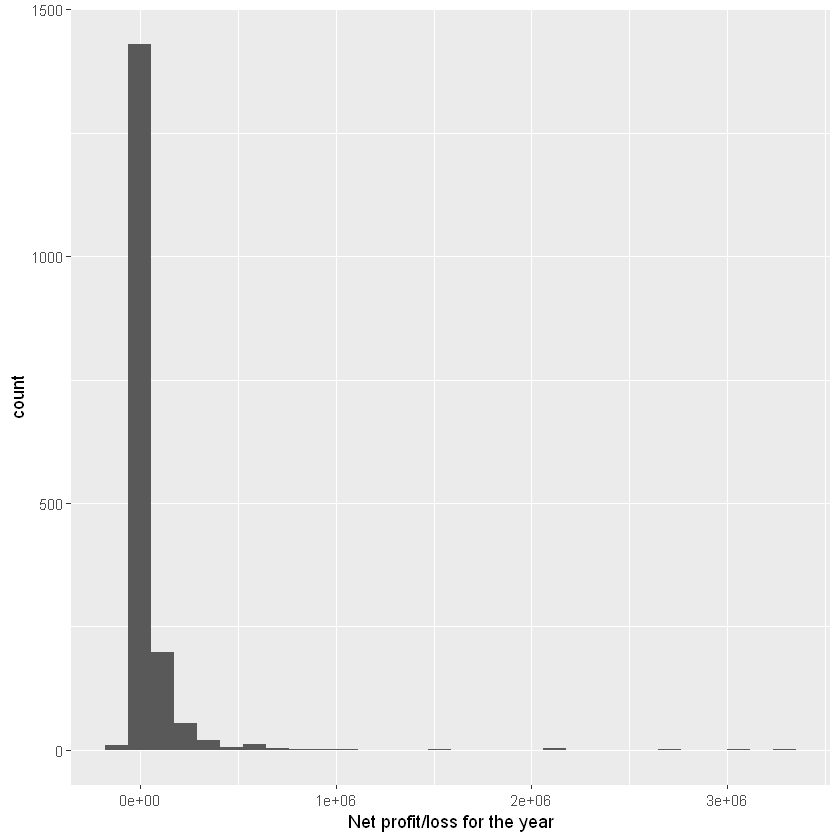

In [182]:
ggplot(data = df) +
  geom_histogram(mapping = aes(x = `Net profit/loss for the year`), bins=30)

Visualize the distrubtion of Net profit/loss for the year for each majority ruling

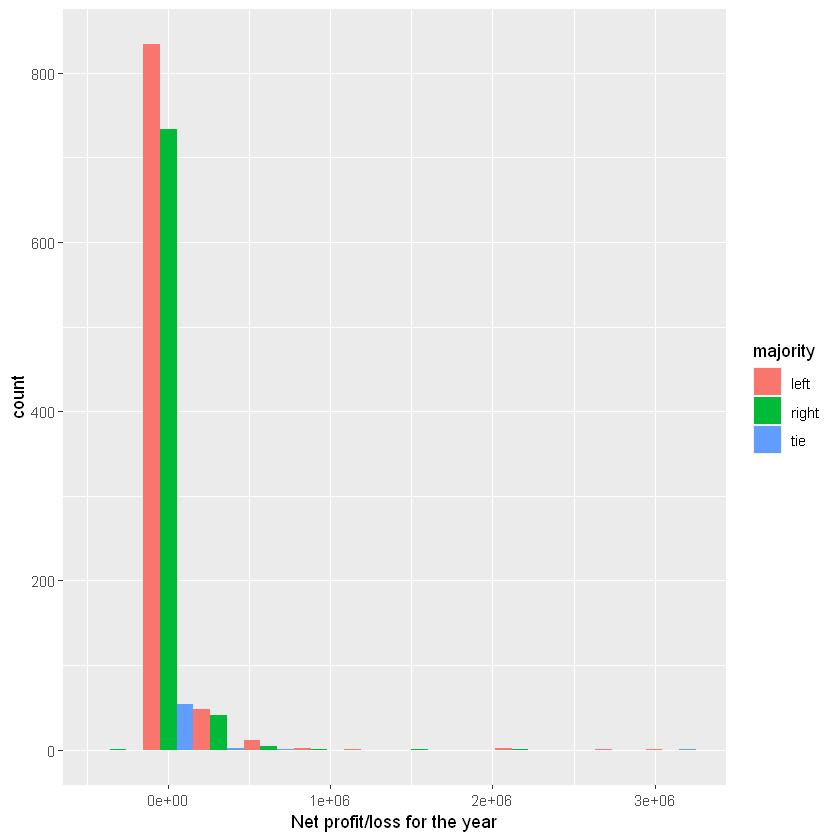

In [183]:
ggplot(data = df) +
  geom_histogram(mapping = aes(x = `Net profit/loss for the year`, fill=majority), bins=12, position = "dodge")

Visualize the relation between tax revenues and General grants and equalisation grants for the year for each majority ruling

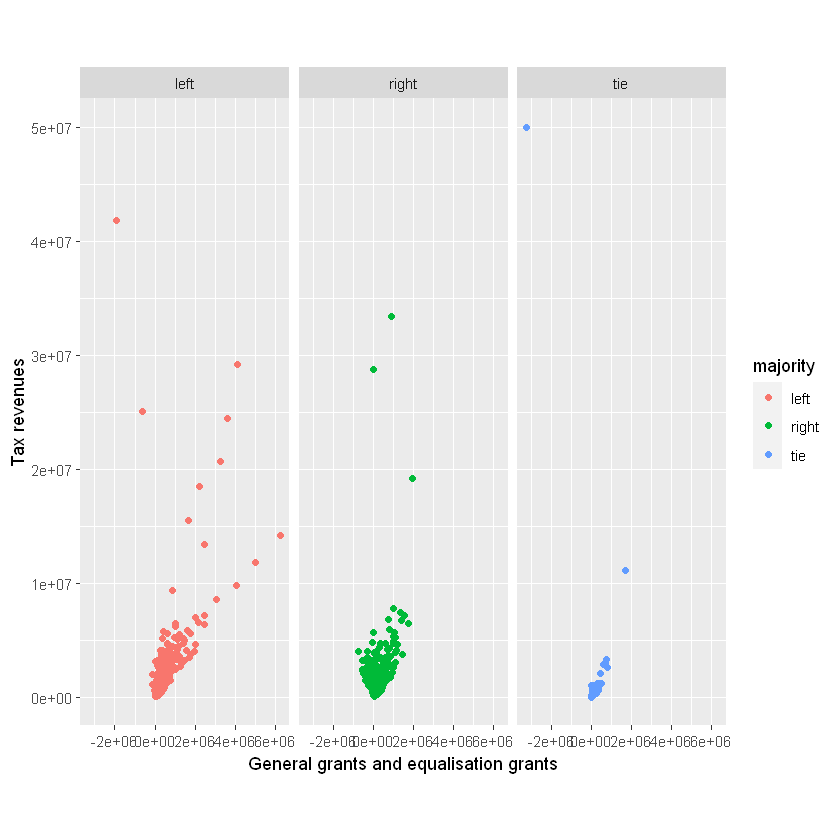

In [184]:
ggplot(data = df) +
  geom_point(mapping = aes(x = `General grants and equalisation grants`, y = `Tax revenues`, color=majority)) + 
  facet_wrap(~majority) + 
  theme(aspect.ratio = 3)

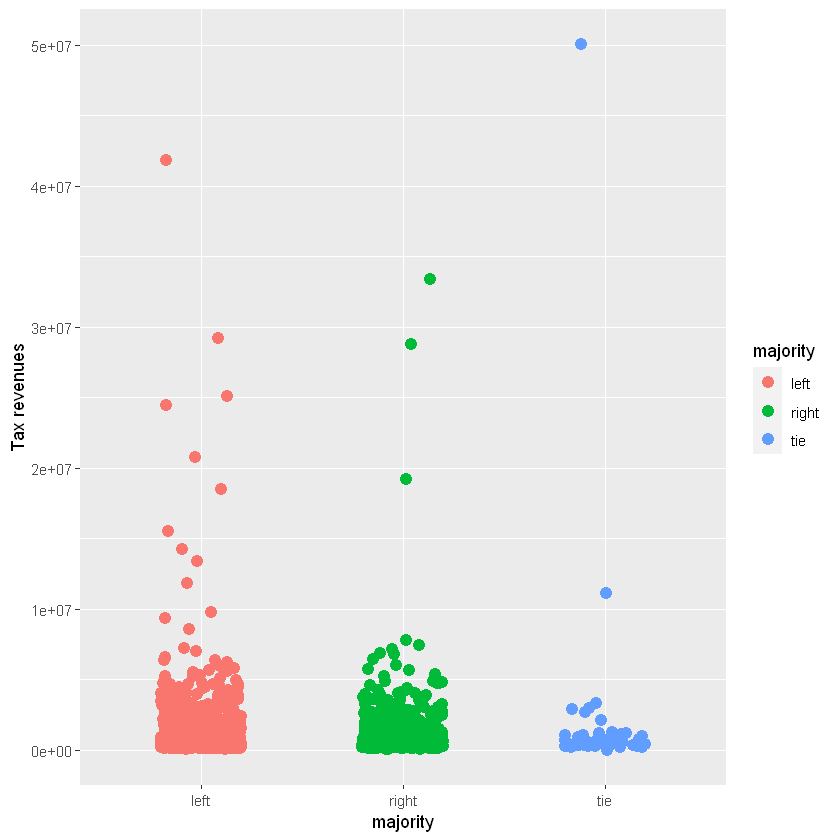

In [185]:
ggplot(df, aes(x = majority, y = `Tax revenues`, color = majority)) +
  geom_point(position = position_jitter(width = 0.2), size = 3)

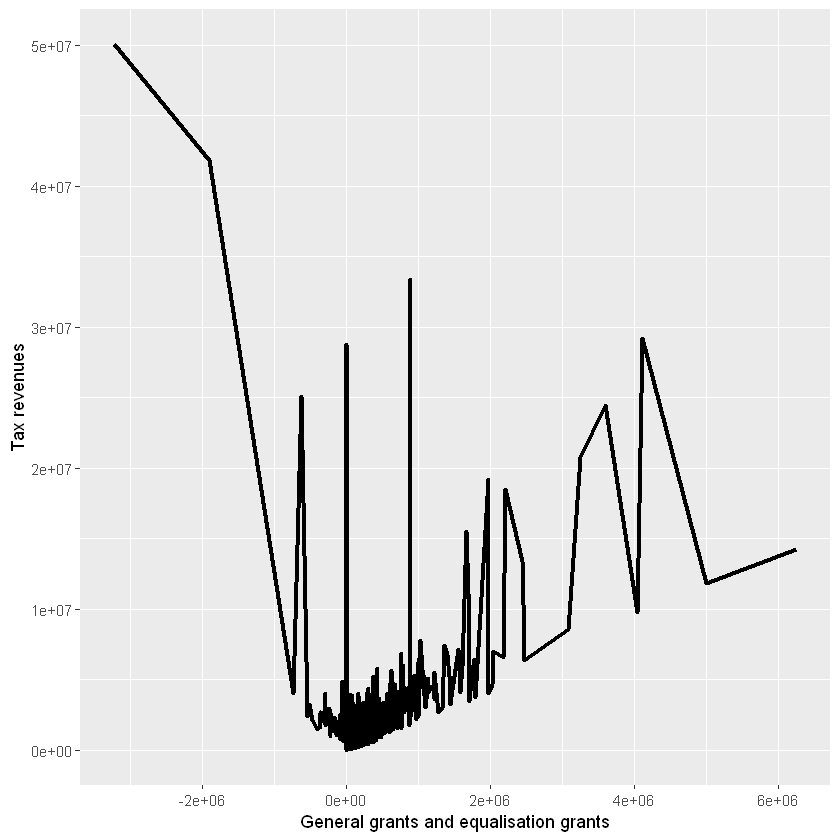

In [186]:
ggplot(df, aes(x = `General grants and equalisation grants`, y = `Tax revenues`)) +
  geom_line(size = 1.2)

## Task 3

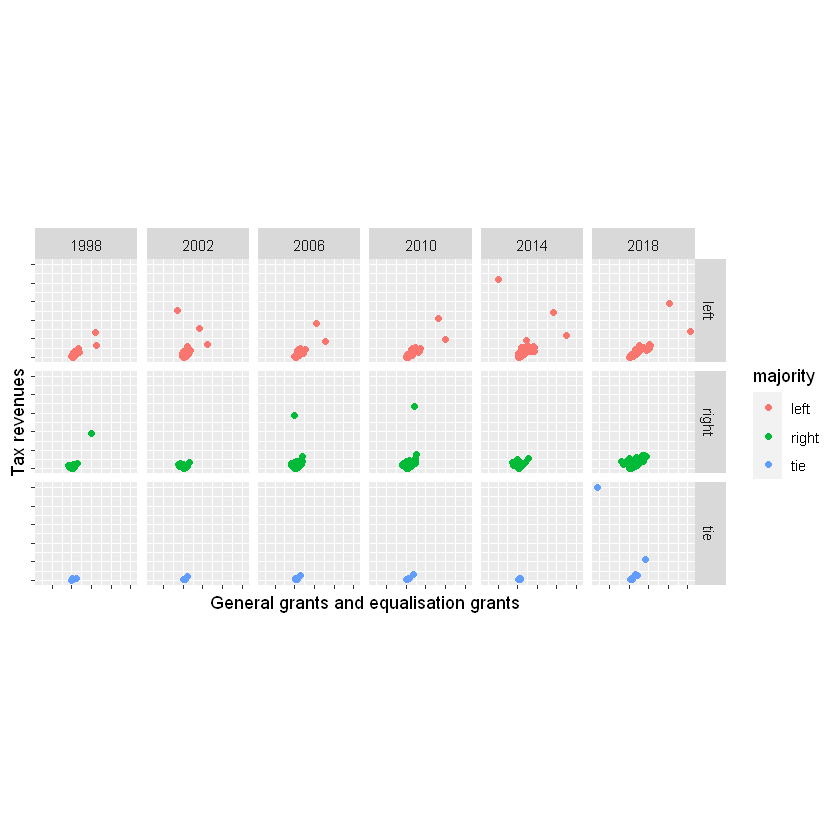

In [187]:
ggplot(data = df) +
  geom_point(mapping = aes(x = `General grants and equalisation grants`, y = `Tax revenues`, color=majority)) +
  facet_grid(majority~year) +
  theme(aspect.ratio = 1, axis.text.x = element_blank(), axis.text.y = element_blank())

In [188]:
df_cop <- df %>%
    group_by(majority, year) %>%
    summarize_all(mean)
df_cop

Warning message:
"There were 18 warnings in `summarise()`.
The first warning was:
ℹ In argument: `region = (function (x, ...) ...`.
ℹ In group 1: `majority = "left"`, `year = "1998"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 17 remaining warnings."


majority,year,region,The Moderate Party,The Centre Party,The Liberal Party,The Christian Democratic Party,The Green Party,The Social Democratic Party,The Left Party,⋯,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
left,1998,NA,7.694611,4.269461,2.209581,3.281437,2.017964,19.64671,5.946108,⋯,-29080.732,32090.292,178424.78,2972.290,0.00,24671.365,824599.1,-1235103.7,303188.2,-1001818.5
left,2002,NA,6.201183,4.585799,4.278107,3.023669,1.698225,20.27811,4.668639,⋯,-38889.053,54117.581,178256.18,14268.092,0.00,20894.845,1161144.3,-1656936.2,403208.0,-1338909.8
left,2006,NA,7.251908,4.740458,2.809160,2.206107,1.435115,19.87023,3.725191,⋯,-37661.273,48215.050,255103.83,35625.181,0.00,52005.653,1122555.7,-1650077.4,381429.0,-1350990.0
left,2010,NA,8.064286,4.071429,2.671429,1.471429,2.150000,18.87143,3.400000,⋯,-40933.023,45237.350,323799.94,37457.246,0.00,52205.866,1199708.6,-1837025.8,409508.5,-1490091.8
left,2014,NA,7.670270,4.200000,2.362162,1.448649,2.589189,17.01081,3.183784,⋯,-27495.818,48099.654,370307.20,76303.408,0.00,76076.001,1709858.6,-2563717.1,623824.7,-2024466.3
left,2018,NA,6.500000,4.379630,1.888889,1.564815,1.129630,15.56481,3.583333,⋯,-27067.065,55220.919,525336.26,91755.840,57468.89,90109.088,1681467.2,-2631133.3,587806.5,-2143201.5
right,1998,NA,10.619469,7.221239,2.743363,4.327434,1.778761,13.47788,2.725664,⋯,-24052.210,30109.201,100402.83,5113.232,0.00,9928.949,663868.4,-945331.1,228090.0,-764257.3
right,2002,NA,8.370690,7.663793,4.396552,4.163793,1.318966,14.07759,2.103448,⋯,-8898.681,10356.515,88730.98,8186.254,0.00,15837.034,614492.4,-840760.2,192700.2,-695968.0
right,2006,NA,11.377483,6.715232,3.549669,3.357616,1.549669,14.01987,1.761589,⋯,-19112.954,37268.969,140581.01,34240.631,0.00,48584.783,1104055.6,-1514394.7,357938.6,-1227094.5


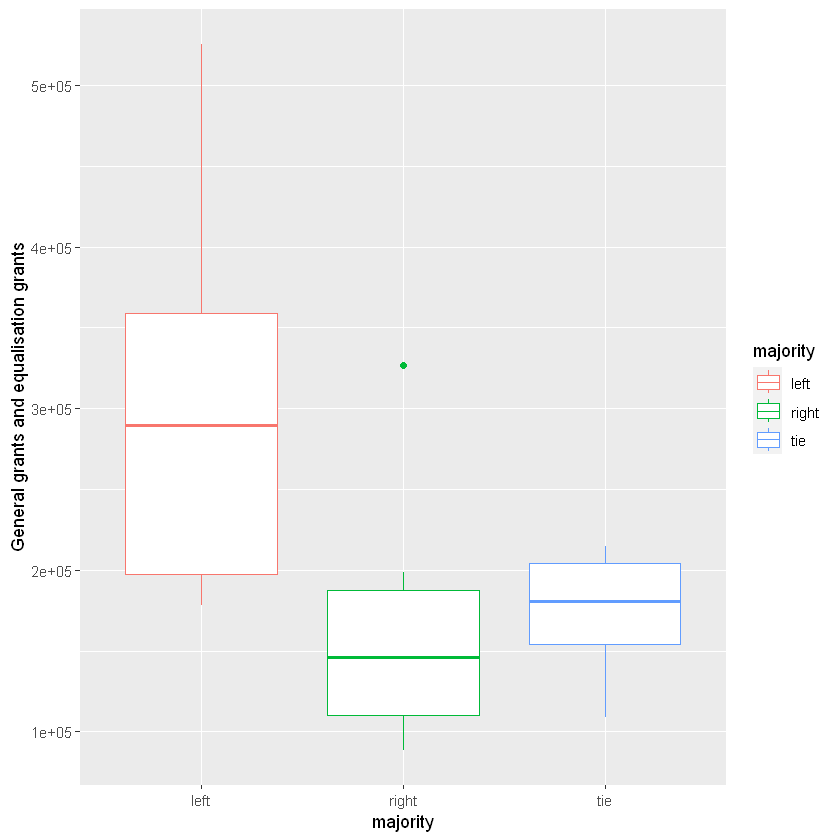

In [189]:
ggplot(data = df_cop) +
  geom_boxplot(mapping = aes(x = majority, y = `General grants and equalisation grants`, color = majority))

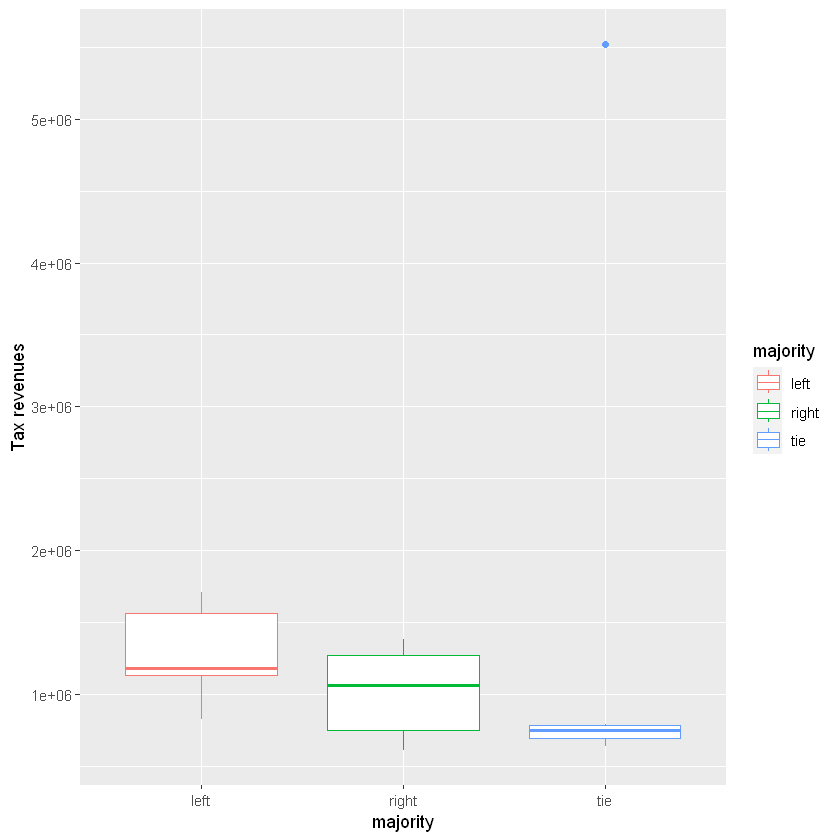

In [190]:
ggplot(data = df_cop) +
  geom_boxplot(mapping = aes(x = majority, y = `Tax revenues`, color = majority))

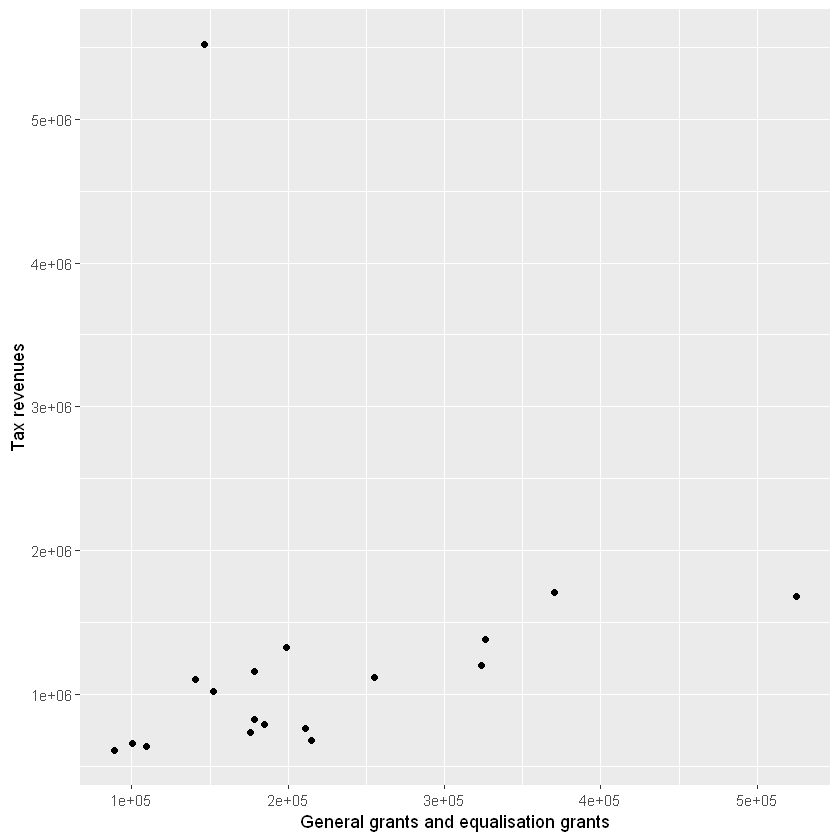

In [191]:
ggplot(df_cop, aes(x = `General grants and equalisation grants`, y = `Tax revenues`)) +
  geom_point()

## Task 10

In [275]:
# Calling cor() on all 
(cormatrix <- df %>% select(`Financial costs`: `Total net current costs`) %>% cor)

,Financial costs,Financial income,General grants and equalisation grants,Net profit/loss after financial items,Net profit/loss for operations,Net profit/loss for the year,Tax revenues,Total costs for operations,Total income for operations,Total net current costs
Financial costs,1.0000000,-0.9274457,-0.3217211,-0.5308828,-0.2320388,-0.5496541,-0.7781482,0.7869547,-0.7829998,0.7844291
Financial income,-0.9274457,1.0000000,0.2435830,0.6308933,0.2758362,0.6104530,0.8442995,-0.8429043,0.8385715,-0.8380998
General grants and equalisation grants,-0.3217211,0.2435830,1.0000000,0.2942088,0.1965459,0.3161086,0.3733531,-0.4668412,0.4022613,-0.4929477
Net profit/loss after financial items,-0.5308828,0.6308933,0.2942088,1.0000000,0.6763555,0.8875184,0.8733429,-0.8569037,0.8714190,-0.8466035
Net profit/loss for operations,-0.2320388,0.2758362,0.1965459,0.6763555,1.0000000,0.5645758,0.5362132,-0.5154078,0.5156508,-0.5158069
Net profit/loss for the year,-0.5496541,0.6104530,0.3161086,0.8875184,0.5645758,1.0000000,0.8136883,-0.8035314,0.8099405,-0.7966793
Tax revenues,-0.7781482,0.8442995,0.3733531,0.8733429,0.5362132,0.8136883,1.0000000,-0.9938088,0.9904528,-0.9905858
Total costs for operations,0.7869547,-0.8429043,-0.4668412,-0.8569037,-0.5154078,-0.8035314,-0.9938088,1.0000000,-0.9919322,0.9988723
Total income for operations,-0.7829998,0.8385715,0.4022613,0.8714190,0.5156508,0.8099405,0.9904528,-0.9919322,1.0000000,-0.9852021
Total net current costs,0.7844291,-0.8380998,-0.4929477,-0.8466035,-0.5158069,-0.7966793,-0.9905858,0.9988723,-0.9852021,1.0000000


In [276]:
(cortibble <- as_tibble(cormatrix, rownames = "X") %>%
    pivot_longer(
        -X,
        names_to = "Y",
        values_to = "cor"
    ))

X,Y,cor
<chr>,<chr>,<dbl>
Financial costs,Financial costs,1.0000000
Financial costs,Financial income,-0.9274457
Financial costs,General grants and equalisation grants,-0.3217211
Financial costs,Net profit/loss after financial items,-0.5308828
Financial costs,Net profit/loss for operations,-0.2320388
Financial costs,Net profit/loss for the year,-0.5496541
Financial costs,Tax revenues,-0.7781482
Financial costs,Total costs for operations,0.7869547
Financial costs,Total income for operations,-0.7829998


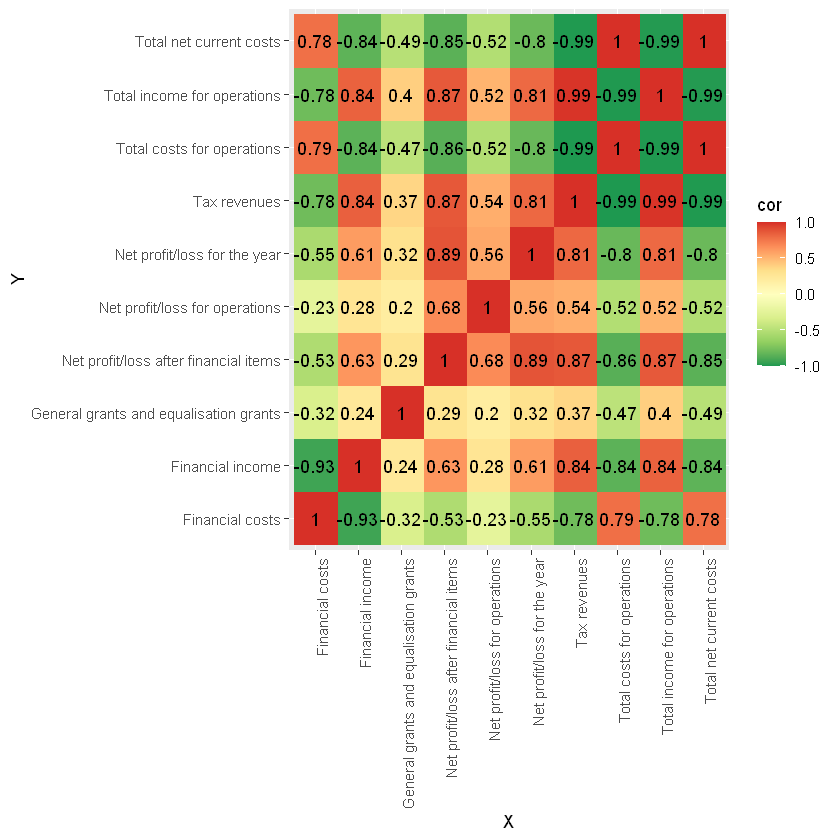

In [277]:
ggplot(cortibble, aes(X, Y)) +
  geom_raster(aes(X, Y, fill = cor)) +
  geom_text(aes(label = round(cor, 2)))+ 
  scale_fill_distiller(palette = "RdYlGn", limits=c(-1, 1))+
  theme(axis.text.x = element_text(angle=90, hjust=1)) 

In [278]:
# Class distribution
percentage <- prop.table(table(df$majority)) * 100
cbind(freq=table(df$majority), percentage=percentage)

,freq,percentage
left,900,51.724138
right,782,44.942529
tie,58,3.333333


In [279]:
possitive_features <- c("region", "General grants and equalisation grants", "year", "Total net current costs", "Total income for operations", "Total costs for operations", "Tax revenues", "Net profit/loss for operations", "Net profit/loss after financial items", "Financial costs", "majority")

df_clean <- select(df, all_of(possitive_features))
df_clean$majority <- as.factor(df_clean$majority)
df_clean$region <- as.factor(df_clean$region)
print(is.factor(df_clean$majority))

[1] TRUE


In [280]:
# create a list of 80% of the rows in the original dataset we can use for training
test_index <- createDataPartition(df_clean$majority, p=0.80, list=FALSE)
# select 20% of the data for validation
test <- df_clean[-test_index,]
# use the remaining 80% of data to training and testing the models
df_clean <- df_clean[test_index,]

In [281]:
(rf_mod <-
     rand_forest(mtry = 2, trees = 100) %>%
     set_engine("ranger", importance = "impurity") %>%
     set_mode("classification"))

Random Forest Model Specification (classification)

Main Arguments:
  mtry = 2
  trees = 100

Engine-Specific Arguments:
  importance = impurity

Computational engine: ranger 


In [282]:
(rf_fit <- rf_mod %>% fit(majority~., data = df_clean))

parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, mtry = min_cols(~2,      x), num.trees = ~100, importance = ~"impurity", num.threads = 1,      verbose = FALSE, seed = sample.int(10^5, 1), probability = TRUE) 

Type:                             Probability estimation 
Number of trees:                  100 
Sample size:                      1393 
Number of independent variables:  10 
Mtry:                             2 
Target node size:                 10 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.2136807 

In [283]:
pred <- predict(rf_fit, new_data = test)
pred$.pred_class <- as.factor(pred$.pred_class)

(confmat <- confusionMatrix(pred$.pred_class, test$majority))

Confusion Matrix and Statistics

          Reference
Prediction left right tie
     left   131    43   4
     right   49   113   7
     tie      0     0   0

Overall Statistics
                                          
               Accuracy : 0.7032          
                 95% CI : (0.6521, 0.7508)
    No Information Rate : 0.5187          
    P-Value [Acc > NIR] : 2.04e-12        
                                          
                  Kappa : 0.4236          
                                          
 Mcnemar's Test P-Value : 0.009788        

Statistics by Class:

                     Class: left Class: right Class: tie
Sensitivity               0.7278       0.7244     0.0000
Specificity               0.7186       0.7068     1.0000
Pos Pred Value            0.7360       0.6686        NaN
Neg Pred Value            0.7101       0.7584     0.9683
Prevalence                0.5187       0.4496     0.0317
Detection Rate            0.3775       0.3256     0.0000
Detection Prev

Warning message in geom_histogram(data = pred, mapping = aes(x = .pred_class, fill = .pred_class), :
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


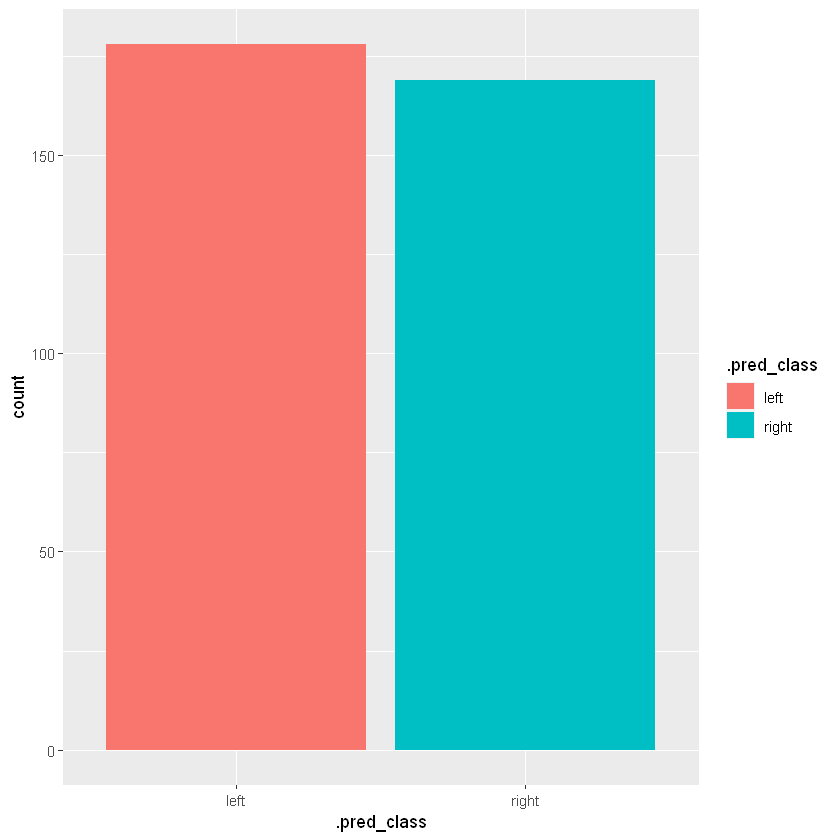

In [284]:
ggplot() +
  geom_histogram(data = pred, mapping = aes(x = .pred_class, fill=.pred_class), stat="count")


Warning message in geom_histogram(data = test, mapping = aes(x = majority, fill = majority), :
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


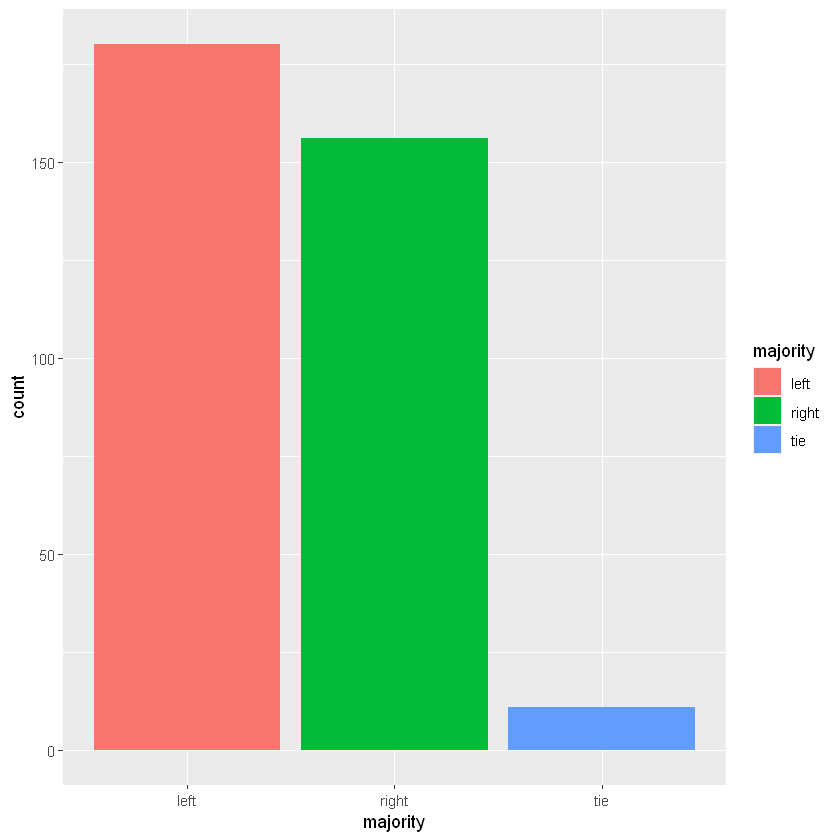

In [285]:
ggplot() +
  geom_histogram(data = test, mapping = aes(x = majority, fill=majority), stat="count")


In [286]:
(svm_mod <-
     svm_linear(cost=4) %>%
     set_engine("kernlab") %>%
     set_mode("classification"))

Linear Support Vector Machine Model Specification (classification)

Main Arguments:
  cost = 4

Computational engine: kernlab 


In [290]:
(svm_fit <- svm_mod %>% fit(majority~., data = df_clean))

 Setting default kernel parameters  


parsnip model object

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 4 

Linear (vanilla) kernel function. 

Number of Support Vectors : 644 

Objective Function Value : -1141.813 -297.2699 -278.5496 
Training error : 0.10122 
Probability model included. 

In [291]:
test[,0:11]

,region,General grants and equalisation grants,year,Total net current costs,Total income for operations,Total costs for operations,Tax revenues,Net profit/loss for operations,Net profit/loss after financial items,Financial costs,majority
,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,0117 Österåker,5019.25,1998,-913898.8,151653.75,-1030488.8,905556.0,0,-12078.50,-9833.00,right
7,0126 Huddinge,219690.25,1998,-2370328.8,470717.00,-2774899.0,2060344.5,0,-35642.25,-2324.50,left
10,0136 Haninge,214116.50,1998,-1734778.8,438896.50,-2071675.0,1677310.0,0,112015.50,-49511.00,left
14,0160 Täby,-297724.75,1998,-1486445.5,415801.50,-1800674.8,1721068.2,0,-65168.75,-33907.00,right
16,0163 Sollentuna,-51398.50,1998,-1509328.8,405828.00,-1844079.2,1543294.0,0,37958.00,-18134.50,right
17,0180 Stockholm,1968362.75,1998,-21259525.0,7753527.50,-28237365.0,19220569.5,0,475924.25,-1755105.25,right
25,0191 Sigtuna,74672.75,1998,-927455.2,271956.25,-1136967.0,856708.5,0,-8522.75,-16069.00,right
26,0192 Nynäshamn,68656.25,1998,-647236.8,177579.00,-774989.0,587015.8,0,1856.75,-17435.00,left
27,0305 Håbo,-20261.75,1998,-427822.0,79197.75,-476042.5,446078.2,0,-21835.00,-20362.75,right


In [292]:
pred <- predict(svm_fit, new_data = test)
pred$.pred_class <- as.factor(pred$.pred_class)

(confmat <- confusionMatrix(pred$.pred_class, test$majority))

Confusion Matrix and Statistics

          Reference
Prediction left right tie
     left   154    22   4
     right   23   134   7
     tie      3     0   0

Overall Statistics
                                         
               Accuracy : 0.83           
                 95% CI : (0.7862, 0.868)
    No Information Rate : 0.5187         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.6719         
                                         
 Mcnemar's Test P-Value : 0.06682        

Statistics by Class:

                     Class: left Class: right Class: tie
Sensitivity               0.8556       0.8590   0.000000
Specificity               0.8443       0.8429   0.991071
Pos Pred Value            0.8556       0.8171   0.000000
Neg Pred Value            0.8443       0.8798   0.968023
Prevalence                0.5187       0.4496   0.031700
Detection Rate            0.4438       0.3862   0.000000
Detection Prevalence   

Warning message in geom_histogram(data = pred, mapping = aes(x = .pred_class, fill = .pred_class), :
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


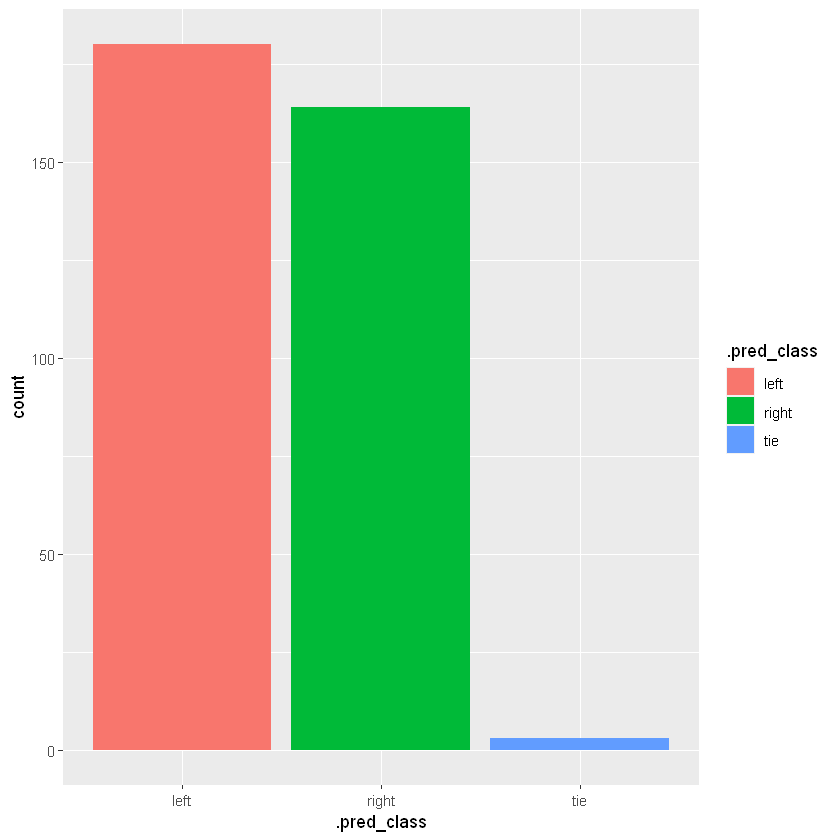

In [293]:
ggplot() +
  geom_histogram(data = pred, mapping = aes(x = .pred_class, fill=.pred_class), stat="count")


Warning message in geom_histogram(data = test, mapping = aes(x = majority, fill = majority), :
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


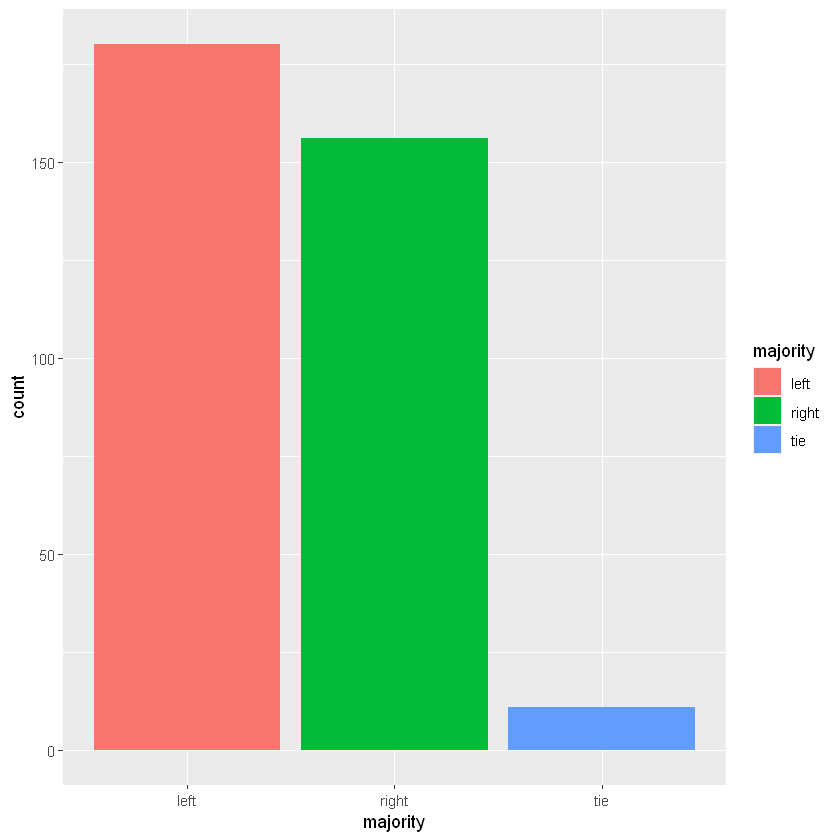

In [294]:
ggplot() +
  geom_histogram(data = test, mapping = aes(x = majority, fill=majority), stat="count")
